# Student Performance predictor

### Life Cycle of This project

1. Understanding the problem
2. Data Collection
3. Data Analysis
4. Data preprocessing
5. Training
6. Evaluation

### 1 Problem Statement
This project learn how test scores of students is affected by various factors like Gender, Test preparation , Ethinicity, Parent level of education etc

### 2 Data gathering

* Data set source - Kaggle
* The data has 8 features and 1000 rows


### 3 Data Analysis

* Data Assesing
    * Mannual Data assement
    * Programatic Data assement
* EDA
    * Single Variate Analysis
    * Bivariate Analysis
    * Multivariate Analysis

**3.1 Import Data and required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/stud.csv')

**3.2 Mannual data assement and observations**

* Dirty Data

    * test_preparation column has value string 'none'
* Messy Data

    * Lunch column has value 'free/reduced'
    * The all three scores column can be removed if we want to calculate average or total marks

**3.3 Programatic data assement and observation**

* Dirty Data

    
* Messy Data

    * The data type of math_score, reading_score, writing_score is int64, can be converted to int 32 as score ranges 0 to 100

In [11]:
# information about data
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Check for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
# Use describe to get the summary statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
# Check for unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.4 Handling Dirty and Messy data issue before EDA**

In [4]:
# convert data types of numeric columns from int 64 to int 32

df['math_score'] = df['math_score'].astype('int32')
df['reading_score'] = df['reading_score'].astype('int32')
df['writing_score'] = df['writing_score'].astype('int32')

In [5]:
# Add column average marks and total marks

df['average_marks'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_marks,total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,282
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,172
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,195
998,female,group D,some college,standard,completed,68,78,77,74.333333,223


**3.5 EDA - Univariate analysis**

Analyse Gender column

In [51]:
# Analyse gender column

(df['gender'].value_counts()/1000)*100 # percentage of gender in the data

gender
female    51.8
male      48.2
Name: count, dtype: float64

In [54]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


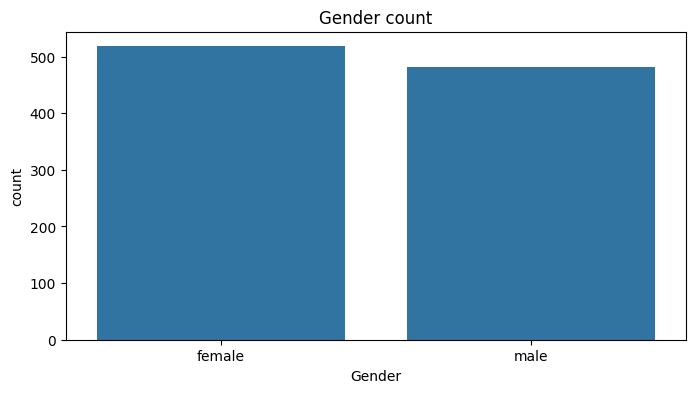

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender count')
plt.show()

In [ ]:
# Observations
    # 1. The gender is balanced almost equally
    # 2. No missing values

Column race_ethinicity

In [50]:
# Percentage value of each class 
(df['race_ethnicity'].value_counts()/1000)*100 # percentage

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: count, dtype: float64

In [8]:
# Mode value in the class
df['race_ethnicity'].value_counts().index[0] # mode

'group C'

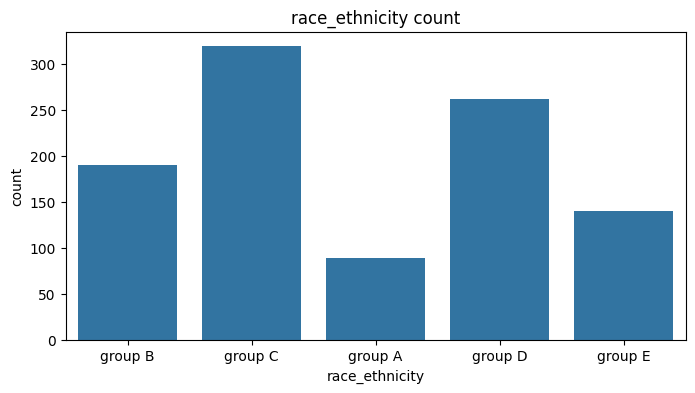

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x='race_ethnicity', data=df)
plt.xlabel('race_ethnicity')
plt.ylabel('count')
plt.title('race_ethnicity count')
plt.show()

In [ ]:
# Observations
    # 1. No missing values
    # 2. Group A is little bit unbalanced

Column parental_level_of_education

In [10]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Column Lunch

In [13]:
# Values count in the Lunch column
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

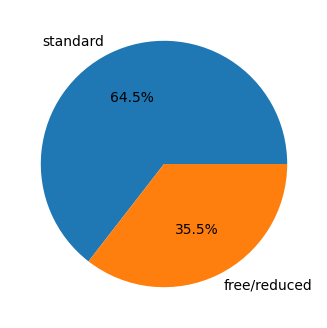

In [15]:
plt.figure(figsize=(8,4))
plt.pie(df['lunch'].value_counts(), labels=df['lunch'].value_counts().index, autopct='%1.1f%%')
plt.show()

Column test_preparation_course

In [5]:
# Value counts 
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

Columns math_score, reading_score, writing_score

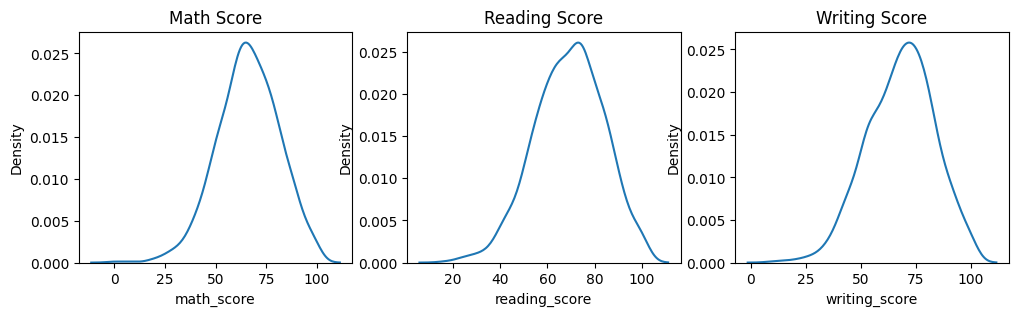

In [29]:
# KDE plot for math, reading and writing score

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

sns.kdeplot(df['math_score'], ax=ax[0])
ax[0].set_title('Math Score')

sns.kdeplot(df['reading_score'], ax=ax[1])
ax[1].set_title('Reading Score')

sns.kdeplot(df['writing_score'], ax=ax[2])
ax[2].set_title('Writing Score')

plt.show()

In [35]:
# Skewness of math, reading and writing score
temp_df = df[['math_score', 'reading_score', 'writing_score']]
temp_df.skew()

math_score      -0.278935
reading_score   -0.259105
writing_score   -0.289444
dtype: float64

In [41]:
# Kurtosis of math, reading and writing score
temp_df.kurtosis()

math_score       0.274964
reading_score   -0.068265
writing_score   -0.033365
dtype: float64

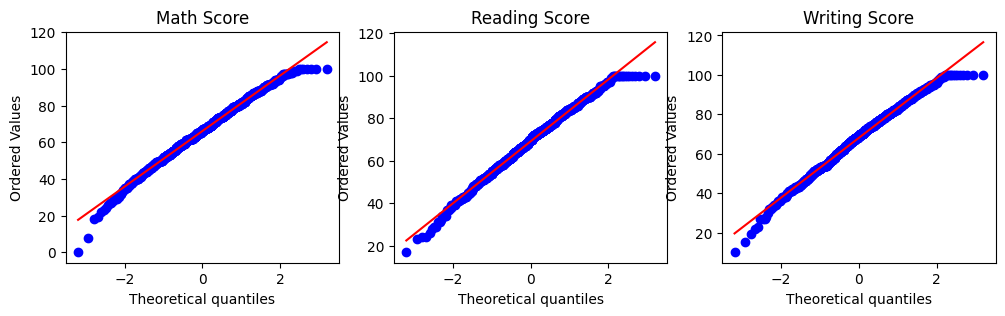

In [40]:
# QQ plot for math, reading and writing score

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

stats.probplot(df['math_score'], plot=ax[0])
ax[0].set_title('Math Score')

stats.probplot(df['reading_score'], plot=ax[1])
ax[1].set_title('Reading Score')

stats.probplot(df['writing_score'], plot=ax[2])
ax[2].set_title('Writing Score')

plt.show()

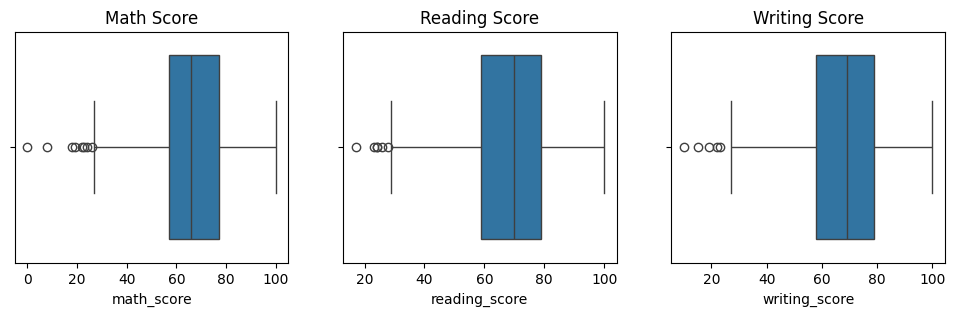

In [44]:
# Check for outliers in math, reading and writing score using boxplot

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

sns.boxplot(df['math_score'], ax=ax[0], orient='h')
ax[0].set_title('Math Score')

sns.boxplot(df['reading_score'], ax=ax[1], orient='h')
ax[1].set_title('Reading Score')

sns.boxplot(df['writing_score'], ax=ax[2], orient='h')
ax[2].set_title('Writing Score')

plt.show()

In [48]:
# Calulating percentage of data points that are outliers in math, reading and writing score

math_ouliers = df[(df['math_score'] > df['math_score'].mean() + 3*df['math_score'].std()) | (df['math_score'] < df['math_score'].mean() - 3*df['math_score'].std())].shape[0]/df.shape[0]*100
reading_ouliers = df[(df['reading_score'] > df['reading_score'].mean() + 3*df['reading_score'].std()) | (df['reading_score'] < df['reading_score'].mean() - 3*df['reading_score'].std())].shape[0]/df.shape[0]*100
writing_ouliers = df[(df['writing_score'] > df['writing_score'].mean() + 3*df['writing_score'].std()) | (df['writing_score'] < df['writing_score'].mean() - 3*df['writing_score'].std())].shape[0]/df.shape[0]*100

In [53]:
math_ouliers, reading_ouliers, writing_ouliers

(0.4, 0.4, 0.4)

In [54]:
# Observation

    # 1. The math, reading and writing score are almost normally distributed
    # 2. There are no missing values
    # 3. all three contains outliers almost 4% of the data points

**EDA - Bivariate Analysis**

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Column - gender and parential_level_of_education

In [30]:
# Observing the relationship between gender and parental level of education with average marks
pd.crosstab(df['gender'], df['parental_level_of_education'], values=df['average_marks'], aggfunc='mean')

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
gender,,,,,,
female,71.123563,74.671958,64.748227,73.648148,71.002825,65.564103
male,67.867925,68.775758,61.575163,73.521739,65.716049,64.636364


In [31]:
# observation

    # 1. The higher the education of parents, the higher the average marks of students
    # 2. The average marks of female students are higher than male students
    # 3. both columns contribute to the average marks of students

Column - gender and race_ethicity 

In [9]:
pd.crosstab(df['gender'], df['race_ethnicity'], values=df['average_marks'], aggfunc='mean', margins=True)

race_ethnicity,group A,group B,group C,group D,group E,All
gender,,,,,,
female,65.129630,67.509615,68.585185,71.439276,74.062802,69.569498
male,61.540881,63.000000,65.249400,66.987469,71.478873,65.837483
All,62.992509,65.468421,67.131661,69.179389,72.752381,67.770667


In [10]:
# Observations

    # 1. The average marks of group are in increasing order from A to E, we can convert this column to ordinal
    # 2. The average marks of female students are higher than male students in all groups

Column - Gender & test_preparation_course

In [11]:
pd.crosstab(df['gender'], df['test_preparation_course'], values=df['average_marks'], aggfunc='mean', margins=True)

test_preparation_course,completed,none,All
gender,,,
female,74.454710,66.878244,69.569498
male,70.781609,63.044372,65.837483
All,72.669460,65.038941,67.770667


In [12]:
# Observations
    
        # 1. The average marks of students who completed the test preparation course are higher than students who didn't
        # 2. 

Column - Gender & lunch

In [13]:
pd.crosstab(df['gender'], df['lunch'], values=df['average_marks'], aggfunc='mean', margins=True)

lunch,free/reduced,standard,All
gender,,,
female,63.215168,73.219858,69.569498
male,61.042169,68.356540,65.837483
All,62.199061,70.837209,67.770667


In [14]:
# Observations
    
        # 1. The average marks of students who have standard lunch are higher than students who have free/reduced lunch
        # 2. The average marks of female are higher than male in both lunch categories

Pairplot of all numerical columns

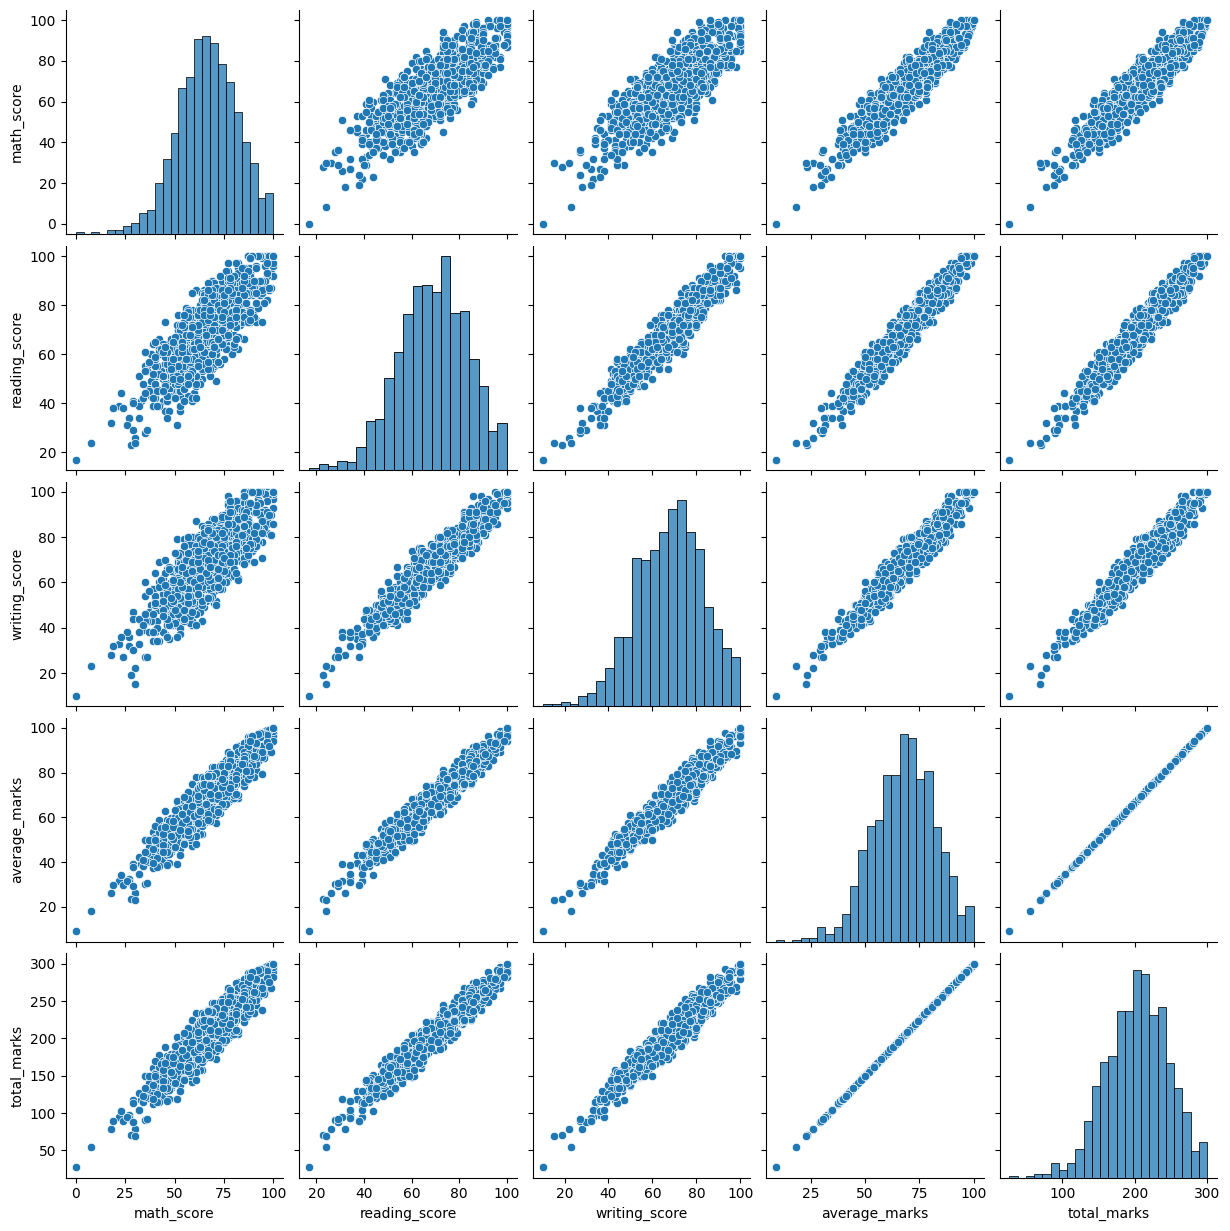

In [15]:
sns.pairplot(df[['math_score', 'reading_score', 'writing_score', 'average_marks', 'total_marks']])

In [ ]:
# Observation
    
        # 1. The math, reading and writing score are highly correlated with each other
        # 2. The average marks and total marks are highly correlated with each other

Column - gender & average_marks

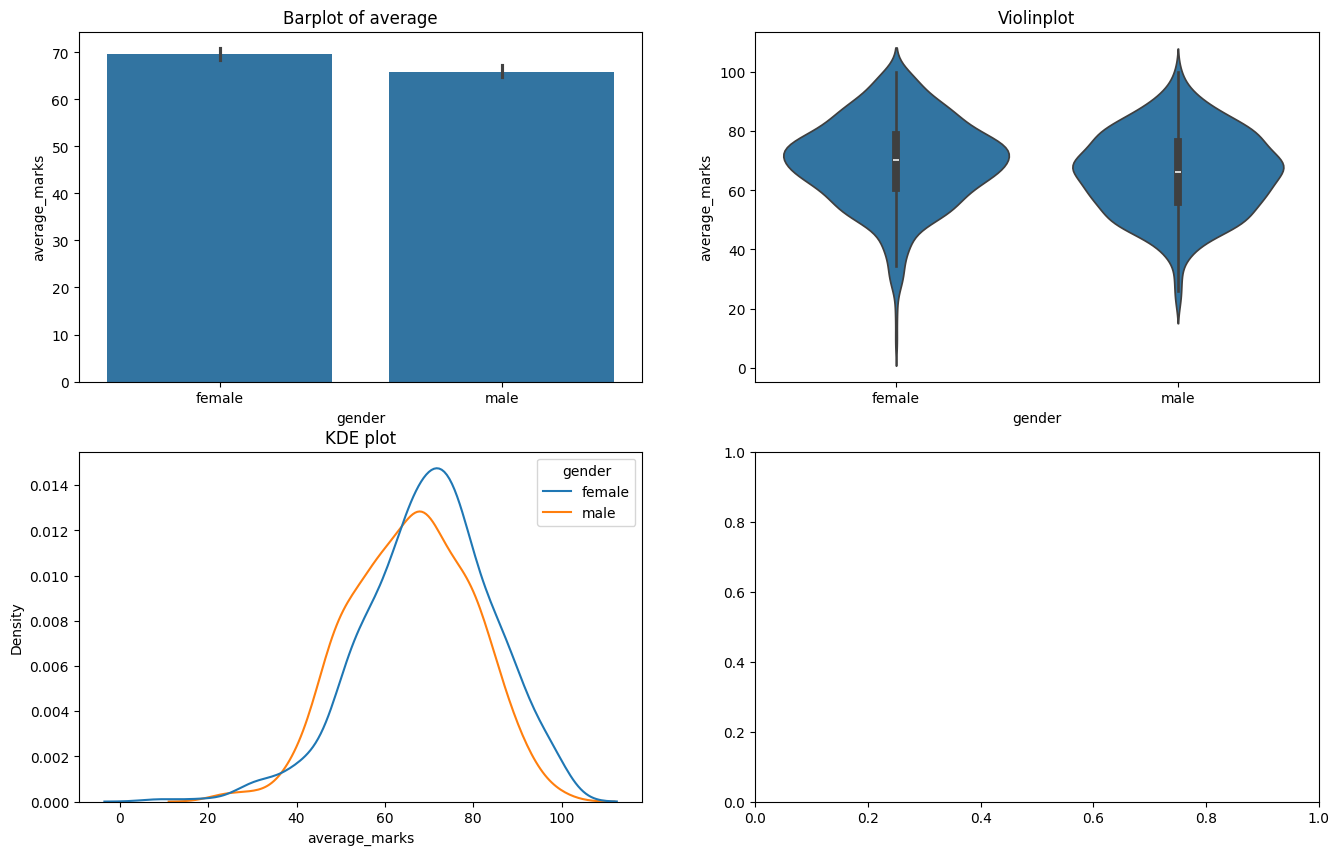

In [36]:
# Relationship between gender and average marks
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.barplot(data=df, x='gender', y='average_marks', ax=ax[0, 0])
ax[0, 0].set_title('Barplot of average')

sns.violinplot(x='gender', y='average_marks', data=df, ax=ax[0,1], orient='v')
ax[0,1].set_title('Violinplot')

sns.kdeplot(data=df, x='average_marks', hue='gender', ax=ax[1,0])
ax[1,0].set_title('KDE plot')

plt.show()


In [23]:
# Observation
        
            # 1. The average marks of female students are higher than male
            # 2. The density plot of female has more spread than male

Column - parental_level_of_education & average_marks

C:\Users\palma\AppData\Local\Temp\ipykernel_11888\2933625703.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\palma\AppData\Local\Temp\ipykernel_11888\2933625703.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\palma\AppData\Local\Temp\ipykernel_11888\2933625703.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)


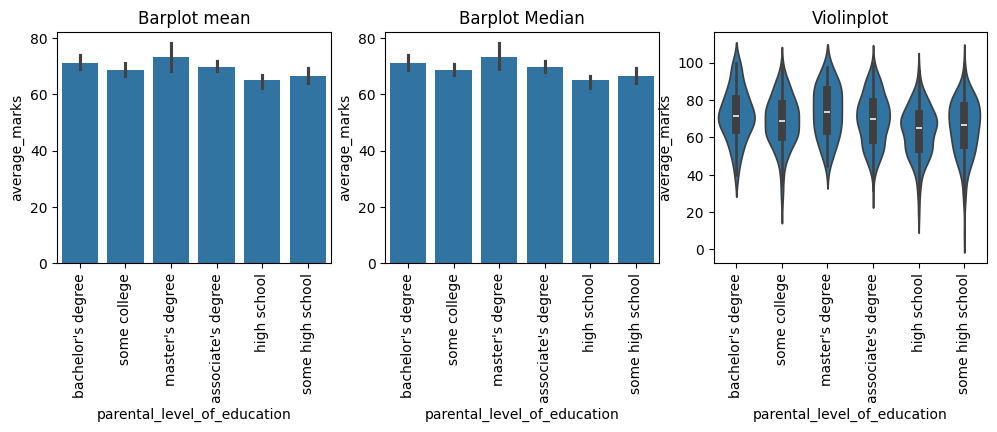

In [22]:
# Relationship between parent_level_of_education and average marks
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

sns.barplot(data=df, x='parental_level_of_education', y='average_marks', ax=ax[0], estimator=np.median)
ax[0].set_title('Barplot mean')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.barplot(data=df, x='parental_level_of_education', y='average_marks', ax=ax[1], estimator=np.median)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Barplot Median')

sns.violinplot(x='parental_level_of_education', y='average_marks', data=df, ax=ax[2], orient='v')
ax[2].set_title('Violinplot')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.show()

In [ ]:
# Observations
    
    # 1. Higher the education of parents, higher the average marks of students


Column - test_preparation_course & average_marks

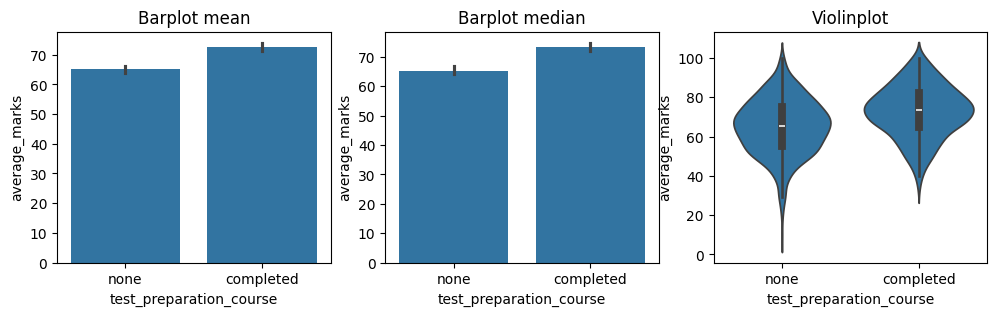

In [25]:
# Relationship
# Relationship between parent_level_of_education and average marks
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

sns.barplot(data=df, x='test_preparation_course', y='average_marks', ax=ax[0], estimator=np.mean)
ax[0].set_title('Barplot mean')

sns.barplot(data=df, x='test_preparation_course', y='average_marks', ax=ax[1], estimator=np.median)
ax[1].set_title('Barplot median')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.violinplot(x='test_preparation_course', y='average_marks', data=df, ax=ax[2], orient='v')
ax[2].set_title('Violinplot')
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

In [23]:
# Observations

    # 1. Avg marks of students who completed the test preparation course are higher than students who didn't
    # 2. pdf of student who has completed test courde is more normally distributed than who did't